In [1]:
# analyze the update record for schedule optimization

# imports

import pandas as pd
import sys

# set up file paths and other data globals

import config, modify

sys.path.append(config.CURRENT_DIR_STR)
sys.path.append(config.COVID_PACKAGE_STR)
sys.path.append(config.UPDATE_FILE_STR)

# local imports
from covid_package.data_funcs.store_data import read_json_data, print_update_record
from covid_package.data_funcs.datetime_funcs import convert_datetime_str_to_obj

from covid_package.plots.plot_results import scatter_plot

In [2]:
# read the update_record.json file
updata = read_json_data(config.UPDATE_FILE_STR)

# get the update datetime list
update_data = updata['update_list']

In [3]:
# organize the column data

update_dict = {
    'datetime_strings': update_data,
    'day_nums': [convert_datetime_str_to_obj(i, 'day_num') for i in update_data], 
    'days': [convert_datetime_str_to_obj(i, 'day') for i in update_data], 
    'hours': list(map(int, [convert_datetime_str_to_obj(i, 'hour') for i in update_data])), 
    'minutes': list(map(int, [convert_datetime_str_to_obj(i, 'minute') for i in update_data]))
    }

In [4]:
# create the dataframe
#df = pd.DataFrame(col_data, columns=col_names)
df = pd.DataFrame(update_dict)
df

,datetime_strings,day_nums,days,hours,minutes
0,2021-04-01T14:40:33Z,4,Thursday,14,40
1,2021-04-03T09:02:46Z,6,Saturday,9,2
2,2021-04-04T08:02:44Z,7,Sunday,8,2
3,2021-04-05T13:02:56Z,1,Monday,13,2
4,2021-04-06T18:02:52Z,2,Tuesday,18,2
5,2021-04-07T16:02:51Z,3,Wednesday,16,2
6,2021-04-08T05:02:50Z,4,Thursday,5,2
7,2021-04-08T14:56:50Z,4,Thursday,14,56
8,2021-04-09T11:31:06Z,5,Friday,11,31
9,2021-04-10T09:03:00Z,6,Saturday,9,3


In [5]:
df = df.groupby(['day_nums', 'days', 'hours']).size().reset_index(name='counts')
df

,day_nums,days,hours,counts
0,1,Monday,5,1
1,1,Monday,13,1
2,1,Monday,14,1
3,1,Monday,20,1
4,2,Tuesday,17,1
5,2,Tuesday,18,1
6,2,Tuesday,20,1
7,3,Wednesday,14,1
8,3,Wednesday,16,1
9,4,Thursday,5,1


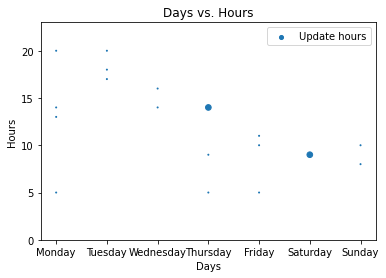

In [6]:

labels = {
    'title': 'Days vs. Hours',
    'x_label': 'Days',
    'y_label': 'Hours'
}

results = {
    'x_axis': df['days'],
    'y_axis': df['hours'],
    'legend_label': 'Update hours'
}

params = {
    'y_lim': (0, 23),
    'area': df['counts']**5,
    'colors': None,
    'alpha': None
}

scatter_plot(labels, results, params)